# 11_03 변수 구간화(Binning)

In [45]:
# 필요한 패키지 설치 및 임포트
!pip install xverse
from xverse.transformer import WOE
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np

In [46]:
# 데이터 불러오기
df = pd.read_csv('/Users/adam/Data_Analytics/Python/Datasets/heart_2020_cleaned/heart_2020_cleaned.csv')

# 데이터 샘플 확인
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [47]:
# BMI 컬럼의 분포 확인

df['BMI'].describe()

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64

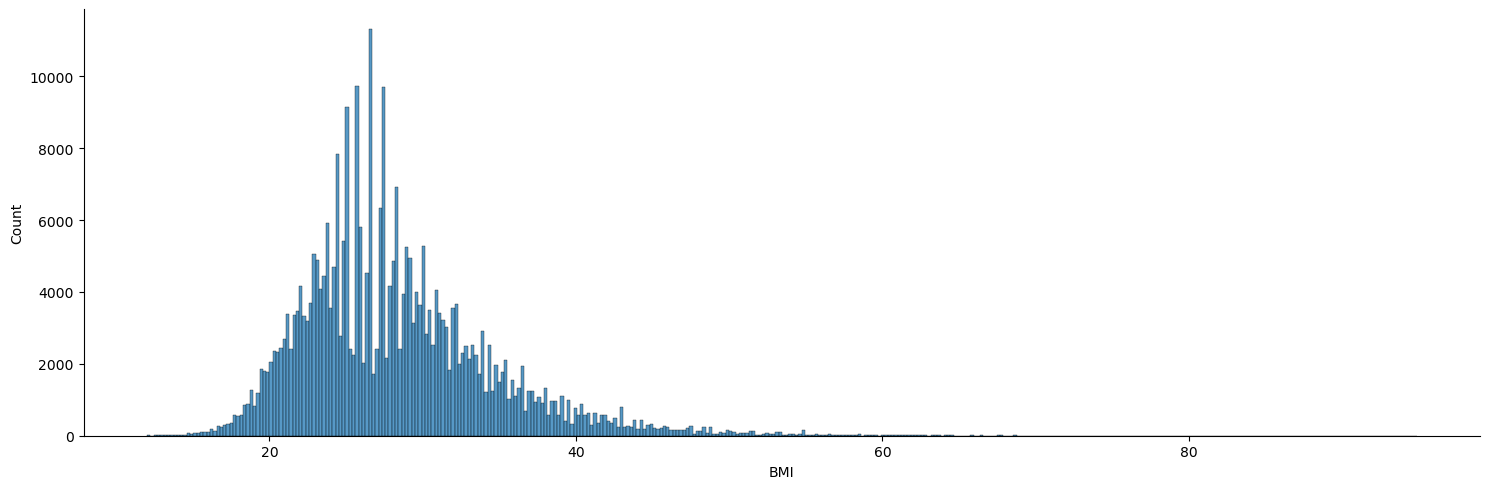

In [48]:
# BMI 컬럼 분포 시각화

sns.displot(df['BMI'],height = 5, aspect = 3)

In [49]:
# 임의로 단순 구간화

df1 = df.copy() # 데이터셋 복사

# 구간화용 빈 컬럼 생성 - 생략해도 되지만 바로 옆에 붙여 보기 위함
df1.insert(2, 'BMI_bin', 0) 

df1.loc[df1['BMI'] <= 20, 'BMI_bin'] = 'a'
df1.loc[(df1['BMI'] > 20) & (df1['BMI'] <= 30), 'BMI_bin'] = 'b'
df1.loc[(df1['BMI'] > 30) & (df1['BMI'] <= 40), 'BMI_bin'] = 'c'
df1.loc[(df1['BMI'] > 40) & (df1['BMI'] <= 50), 'BMI_bin'] = 'd'
df1.loc[(df1['BMI'] > 50) & (df1['BMI'] <= 60), 'BMI_bin'] = 'e'
df1.loc[(df1['BMI'] > 60) & (df1['BMI'] <= 70), 'BMI_bin'] = 'f'
df1.loc[df1['BMI'] > 70, 'BMI_bin'] = 'g'

df1.head()

,HeartDisease,BMI,BMI_bin,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,a,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,b,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,b,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,b,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,b,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


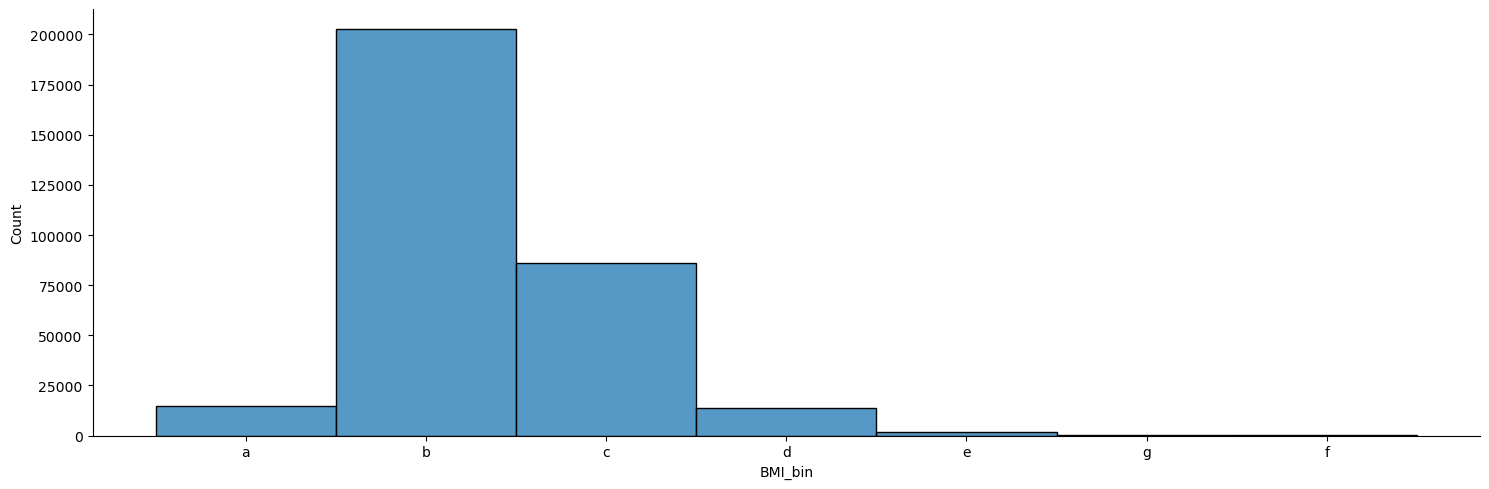

In [50]:
# 구간화 변수 분포 시각화

sns.displot(df1['BMI_bin'], height = 5, aspect = 3)

In [51]:
#  cut() 함수 사용하여 임의로 구간화
df1.insert(3, 'BMI_bin2', 0) # 구간화용 빈 컬럼 생성 

df1['BMI_bin2'] = pd.cut(df1.BMI, bins=[0, 20, 30, 40, 50, 60, 70, 95]
                         , labels=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

df1.head()

,HeartDisease,BMI,BMI_bin,BMI_bin2,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,a,a,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,b,b,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,b,b,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,b,b,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,b,b,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [52]:
# BMI_bin2 구간 별 관측치 수 집계

df1.BMI_bin2.value_counts().to_frame().style.background_gradient(cmap='winter')

,BMI_bin2
b,202548
c,86198
a,14699
d,13839
e,2019
f,363
g,129


In [53]:
# qcut() 함수 사용하여 자동 구간화
df1.insert(4, 'BMI_bin3', 0) # 구간화용 빈 컬럼 생성 

df1['BMI_bin3'] = pd.qcut(df1.BMI, q=7, labels=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

df1.head()

,HeartDisease,BMI,BMI_bin,BMI_bin2,BMI_bin3,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,...,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,a,a,a,Yes,No,No,3.0,30.0,...,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,b,b,a,No,No,Yes,0.0,0.0,...,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,b,b,d,Yes,No,No,20.0,30.0,...,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,b,b,b,No,No,No,0.0,0.0,...,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,b,b,b,No,No,No,28.0,0.0,...,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [54]:
# BMI_bin3 구간 별 관측치 수 집계

df1.BMI_bin3.value_counts().to_frame().style.background_gradient(cmap='winter')

,BMI_bin3
b,47309
a,45980
d,45944
f,45805
g,45255
e,44977
c,44525


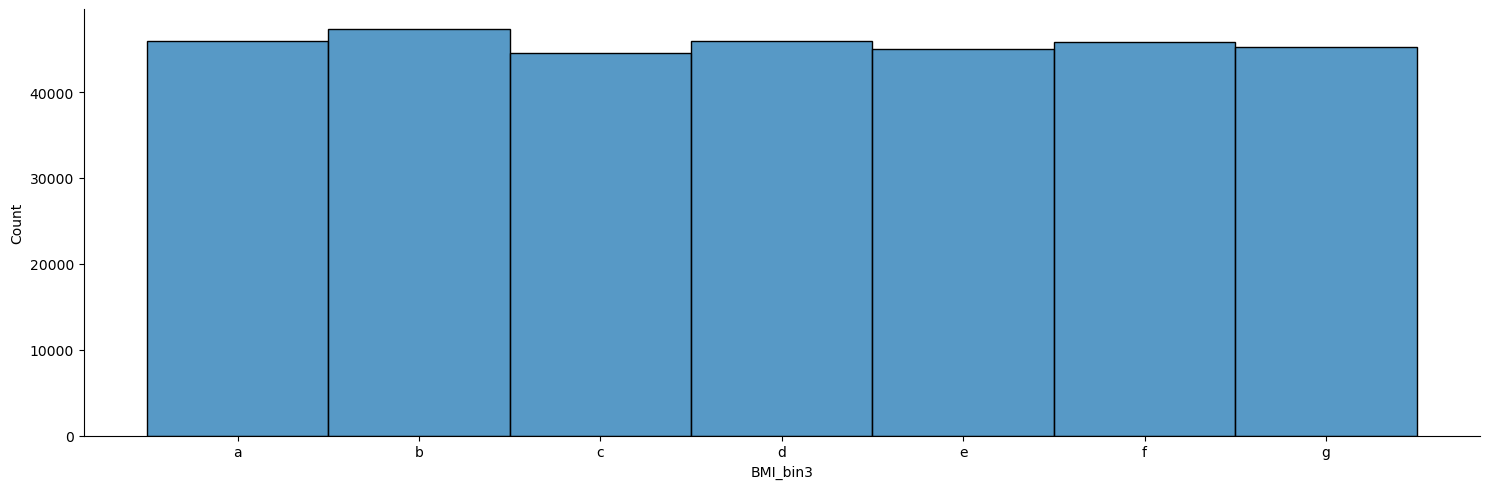

In [55]:
# BMI_bin3 분포 시각화

sns.displot(df1['BMI_bin3'], height=5, aspect=3)

In [56]:
# WOE를 사용한 변수 구간화

df2 = df.copy()  # 데이터셋 복사


# xverse 함수 적용을 위한 더미변수 변환
df2=pd.get_dummies(df)

# 구간화 할 컬럼(X), 기준 컬럼(y) 지정
X = df2[['PhysicalHealth']]
y = df2[['KidneyDisease_Yes']]

y = y.T.squeeze() # 차원 축소

# WOE 모델 설정 및 적용
clf = WOE()
clf.fit(X, y)

# 구간 기준점 및 eight of Evidence 값 테이블 생성
a=clf.woe_df 

#Information Value 데이블 생성
b=clf.iv_df

a.head()

AttributeError: module 'pandas.core.algorithms' has no attribute 'quantile'

In [ ]:
# Xverse 함수 WOE 사용 에러 발생.